In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models


In [2]:
lgMh = np.vstack(np.load("../../data/MW-analog/meta_data_psi4/models.npz")["mass"])

In [3]:
def covariance(lgMh_2D, sigma, lgMs_bins = np.linspace(4.5, 9.5, 45)):
    lgMs_2D = jsm_SHMR.general([10.5, 2.0, sigma, 0, 0, 0], lgMh_2D, 0, 5) 
    N_ij = np.apply_along_axis(jsm_stats.cumulative, 1, lgMs_2D, mass_bins=lgMs_bins) 
    C_ij = np.cov(N_ij.T)

    fig,ax=plt.subplots(figsize=(8,8))
    plt.title(f"sigma = {sigma:.2f}")
    im = ax.imshow(C_ij, extent=[lgMs_bins.min(), lgMs_bins.max(), lgMs_bins.min(), lgMs_bins.max()], cmap="cividis", origin="lower", vmin=0, vmax=100)
    ax.plot(lgMs_bins, lgMs_bins, lw=0.5, color="white", ls="-.")
    ax.set_aspect(1/ax.get_data_ratio(), adjustable="box")
    fig.colorbar(im, label="$C_{i,j}$",  shrink=0.8)
    plt.xlabel("log $M_*$", fontsize=15)
    plt.ylabel("log $M_*$", fontsize=15)
    plt.show()

    return C_ij

-----------------------------


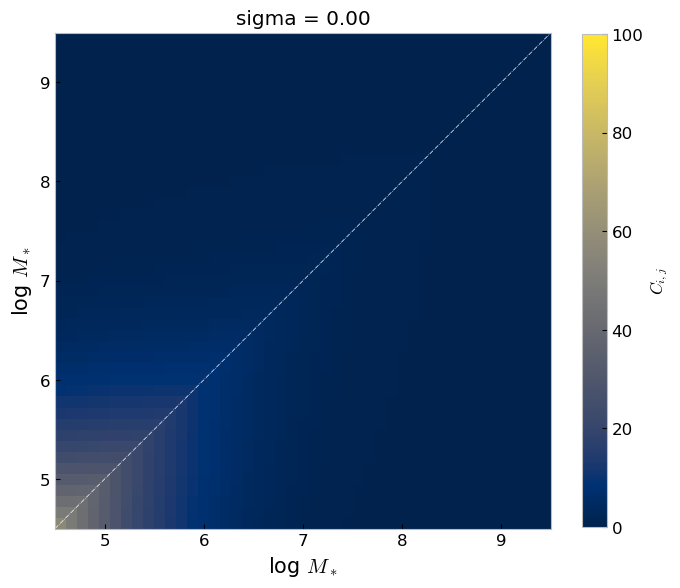

-----------------------------


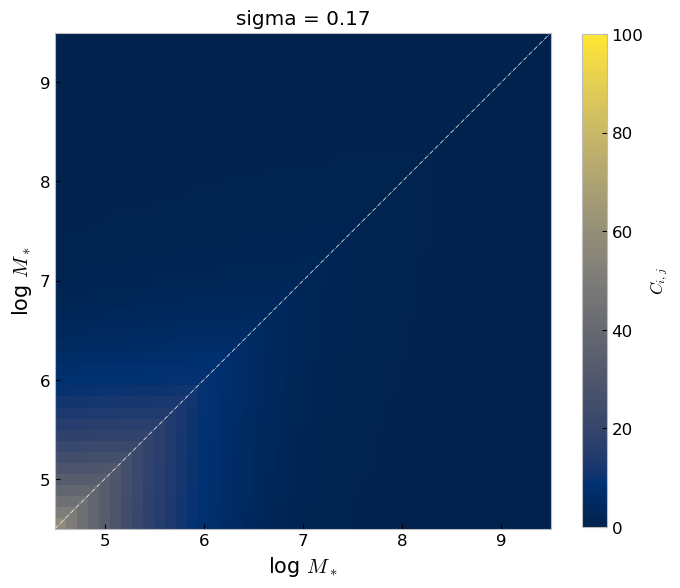

-----------------------------


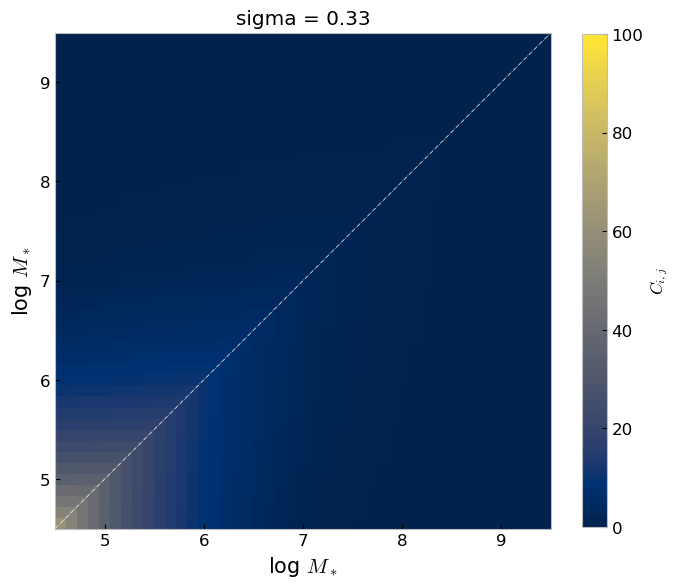

-----------------------------


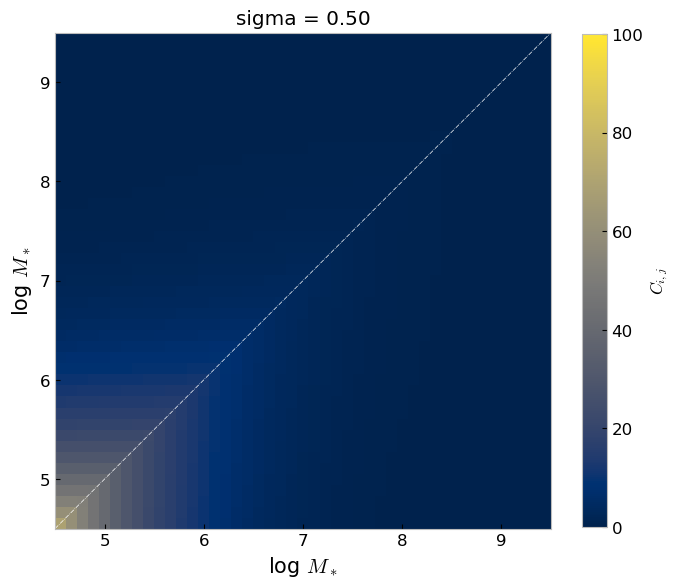

-----------------------------


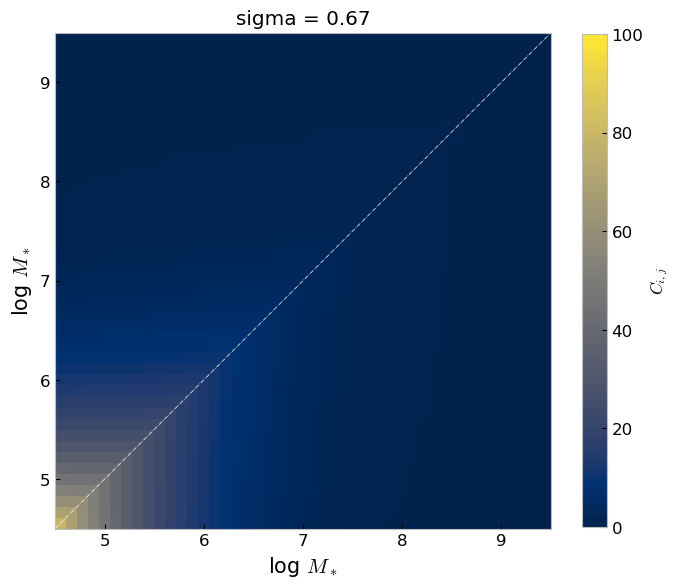

-----------------------------


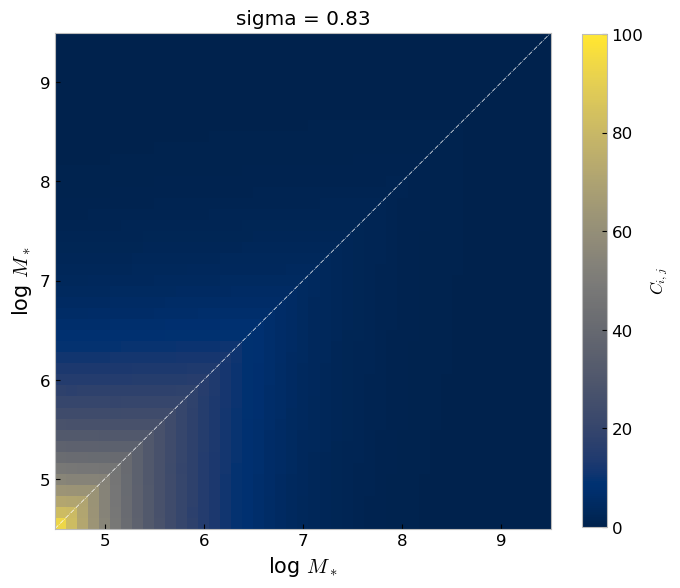

-----------------------------


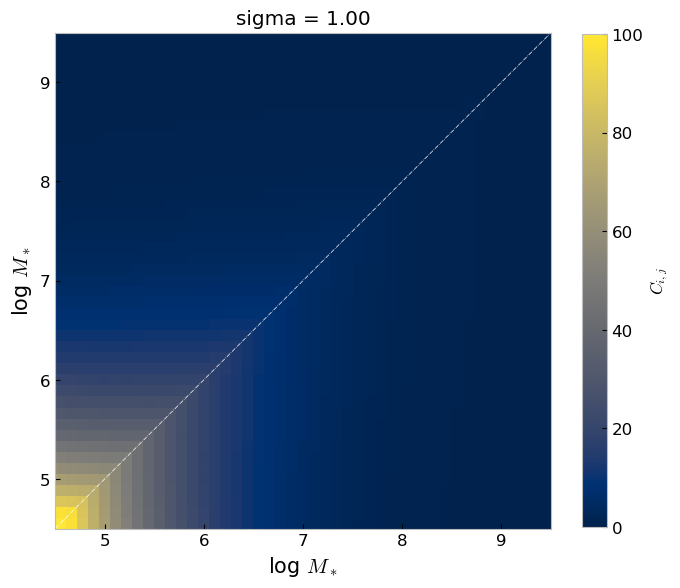

-----------------------------


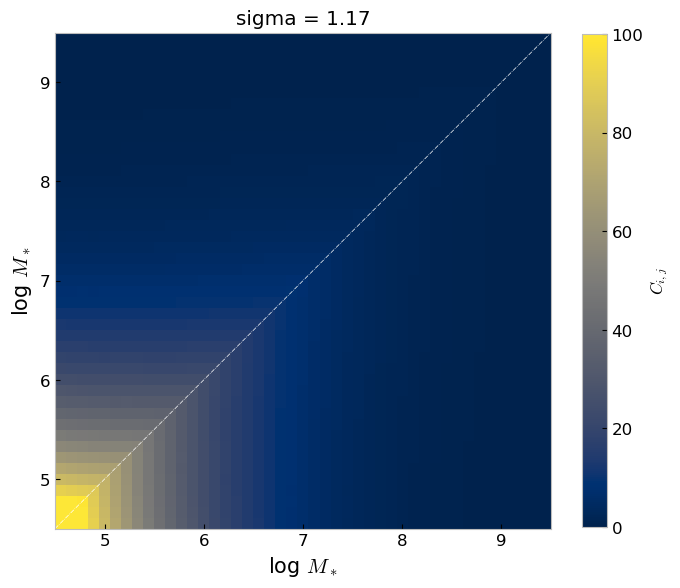

-----------------------------


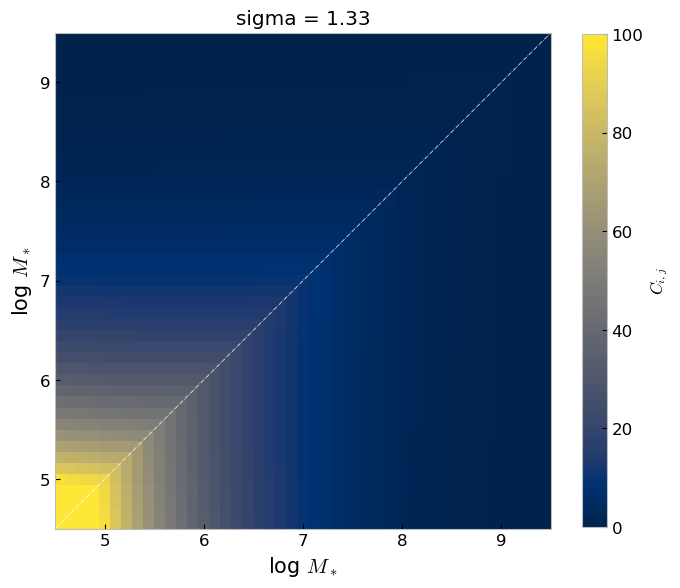

-----------------------------


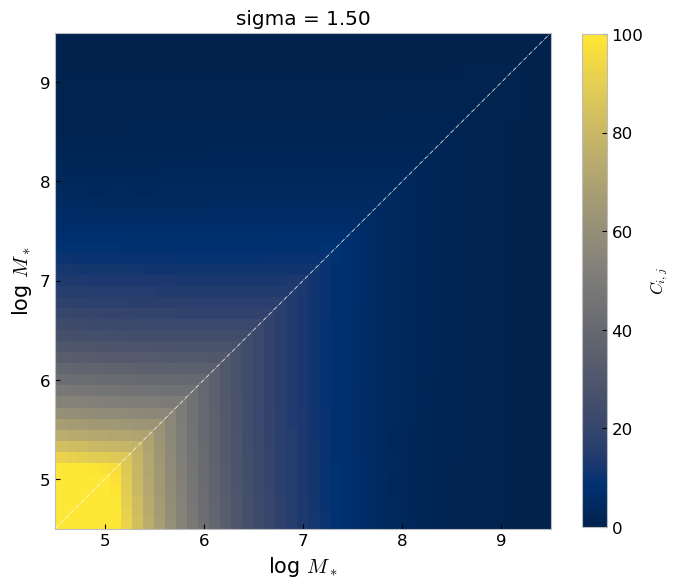

In [4]:
sigmas = np.linspace(0,1.5,10)
for sigma in sigmas:
    print("-----------------------------")
    covariance(lgMh_2D=lgMh, sigma=sigma)